## Algoritms #2
## Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

* [График зависимости весов признаков от lambda с учетом L2-регуляризации](#l2)
* [Проблема совместного использования нормализации и стандартизации](#nstprob)
* [Градиентный спуск с L1 (Ridge) регуляризацией](#l1)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import datasets
np.random.seed(42)

import sklearn.linear_model
%matplotlib inline

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [13]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Полный градиентного спуска
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

# Cтохастический градиентный спуск (батчами)
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [16]:
X_st = X.copy().astype(np.float64)
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

In [17]:
%%time
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [24.13246542  8.82489477 -7.03122524 -2.70327036] 204.34402440118356
200 [33.18264087  6.60286127 -5.65927338  0.81046359] 100.59699117465416
300 [38.88500189  5.11256062 -4.36432892  3.27274287] 57.1840219578987
400 [42.60223448  4.13638525 -3.4115959   4.79813226] 38.78502695177333
500 [45.03492345  3.49653293 -2.70998144  5.72047058] 30.948546205719357
600 [46.63095389  3.0760344  -2.18686417  6.26372184] 27.58538609160118
700 [47.681156    2.79877681 -1.79197065  6.57122699] 26.12526839730112
800 [48.37468162  2.61522803 -1.49040855  6.73408755] 25.48040576428611
900 [48.83466595  2.49312333 -1.25768979  6.80986225] 25.188527113979397
1000 [49.1413554   2.41141991 -1.07641333  6.83463992] 25.051924497995337
Wall time: 49.3 ms


array([49.1413554 ,  2.41141991, -1.07641333,  6.83463992])

In [18]:
%%time
eval_sgd_model(X_st, y, iterations=1000, qty_in_batch=5, alpha=1e-2)

100 [23.81404281  8.92219974 -6.45234569 -3.4671857 ] 210.37746088099402
200 [33.00049723  6.66798247 -5.16407466  0.24275067] 99.13970610229288
300 [38.7903501   5.14991759 -3.95246453  2.83956247] 54.55279081063297
400 [42.56020219  4.15691687 -3.07102272  4.46447435] 35.684655846533516
500 [45.02323245  3.50731004 -2.42906959  5.46204748] 27.733618514651283
600 [46.63582634  3.08143424 -1.95557139  6.06286847] 24.461310766909456
700 [47.69422837  2.80146355 -1.60178108  6.41488364] 23.202967802913125
800 [48.39099733  2.61678707 -1.33416521  6.61247216] 22.81066165948428
900 [48.85139167  2.49446678 -1.12941636  6.71555827] 22.784953535024506
1000 [49.15696454  2.41304459 -0.97114363  6.76196105] 22.906297353901998
Wall time: 135 ms


array([49.15696454,  2.41304459, -0.97114363,  6.76196105])

In [19]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)
        
        if i % (iterations / 10) == 0:
            pass
#             print(i, W, err)
    return W

In [20]:
%%time
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

Wall time: 225 ms


array([49.80471699,  2.23092906, -0.35970167,  6.56909925])

In [21]:
%%time
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [44.89665411  3.5340759  -2.85508454  5.77177809] 31.29757890646664
1000 [49.11630138  2.41848239 -1.12598347  6.86688523] 25.06682876536203
1500 [49.68536967  2.26499201 -0.62046025  6.7460932 ] 24.91713516013481
2000 [49.78184273  2.23803235 -0.45065593  6.64270176] 24.906158942510732
2500 [49.80429004  2.23152877 -0.39048368  6.59827481] 24.904821284754476
3000 [49.81100983  2.22954059 -0.36877216  6.58132911] 24.904645660986823
3500 [49.81328936  2.2288604  -0.36089245  6.57507338] 24.904622423574615
4000 [49.81409992  2.22861784 -0.35802742  6.57278669] 24.904619346578635
4500 [49.81439271  2.22853013 -0.3569851   6.57195339] 24.904618939105266
5000 [49.81449901  2.22849828 -0.35660582  6.57165001] 24.904618885144917
Wall time: 250 ms


array([49.81449901,  2.22849828, -0.35660582,  6.57165001])

## <left>График зависимости весов признаков от lambda с учетом L2-регуляризации<a class="anchor" id="l2"></a><left>

In [23]:
lambdas = np.linspace(1e-4, 50, 100)
y_dat = []
for i in range(len(lambdas)):
    y_dat.append(eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=lambdas[i]))

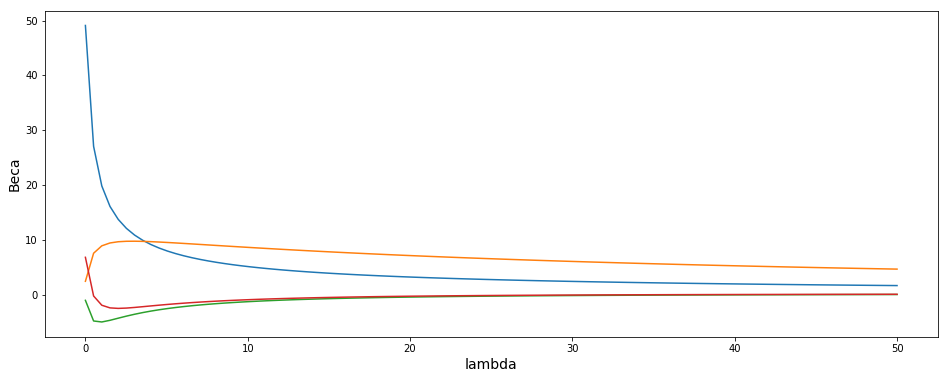

In [27]:
plt.figure(figsize=(16, 6))
plt.xlabel('lambda', fontsize=14)
plt.ylabel('Веса', fontsize=14)
plt.plot(lambdas, y_dat)
# plt.yscale('log')
# plt.xscale('log')
plt.show()

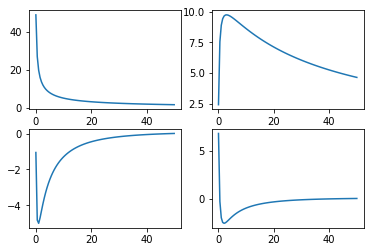

In [39]:
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=False))
axes[0, 0].plot(lambdas, [y[0] for y in y_dat])
axes[0, 1].plot(lambdas, [y[1] for y in y_dat])
axes[1, 0].plot(lambdas, [y[2] for y in y_dat])
axes[1, 1].plot(lambdas, [y[3] for y in y_dat])

## <left>Проблема совместного использования нормализации и стандартизации<a class="anchor" id="nstprob"></a><left>

Использование нормализации и стандартизации вместе не имеет практического смысла. Исходя из основных свойств этих приемов масшабирования результатом `нормализациии` является сужение диапазона номинальных признаков от 0 до 1. После `стандартизации` данных, каждый признак будет иметь среднее 0 и дисперсию 1.

В итоге признаки будут отмасштабированы в диапазоне, соответствующем выводу последнего примененного метода масштабирования.
Докажем это:

In [501]:
# Используем один признак датасета X
Xtest = X[2]

# Применим операцию нормализации
xn = (Xtest - Xtest.min()) / (Xtest.max() - Xtest.min())

# Отдельно применим стандартизацию
xst = calc_std_fit(Xtest)

# К уже нормализованным данным применим стандартизацию, а к стандартизованным - нормализацию
x_n_st = calc_std_fit(xn)
x_st_n = (xst - xst.min()) / (xst.max() - xst.min())

print(f"""
Нормализация - min: {xn.min()}, max: {xn.max()}, std: {round(xn.std(), 2)}, mean: {round(xn.mean(),2)}
Стандартизация - min: {round(xst.min(),2)}, max: {round(xst.max(),2)}, std: {round(xst.std(), 2)}, mean: {round(xst.mean(),2)}
Нормализация-Стандартизация - min: {round(x_n_st.min(),2)}, max: {round(x_n_st.max(),2)}, std: {round(x_n_st.std(), 2)}, mean: {round(x_n_st.mean(),2)}
Стандартизация-Нормализация - min: {x_st_n.min()}, max: {x_st_n.max()}, std: {round(x_st_n.std(), 2)}, mean: {round(x_st_n.mean(),2)}
""")


Нормализация - min: 0.0, max: 1.0, std: 0.31, mean: 0.34
Стандартизация - min: -1.08, max: 2.11, std: 1.0, mean: -0.0
Нормализация-Стандартизация - min: -1.08, max: 2.11, std: 1.0, mean: -0.0
Стандартизация-Нормализация - min: 0.0, max: 1.0, std: 0.31, mean: 0.34



## <left>Градиентный спуск с L1 (Ridge) регуляризацией<a class="anchor" id="l1"></a><left>

L1 регуляризация

L2 регуляризация

In [28]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        
        if i % (iterations / 10) == 0:
            pass
#             print(i, W, err)
    return W

In [29]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([49.81444396,  2.22850055, -0.35609922,  6.57113896])

In [30]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([49.80471483,  2.23092971, -0.35970939,  6.56910542])